In [1]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import urllib
import netCDF4
from mpl_toolkits.basemap import Basemap
import sys


In [2]:
from dem import readem

In [3]:
%matplotlib notebook

In [4]:
def pltm(minlat,maxlat,minlon,maxlon,lons,lats,topo,title=None):

# Create map
 m = Basemap(projection='cyl', llcrnrlat=minlat,urcrnrlat=maxlat,llcrnrlon=minlon, urcrnrlon=maxlon,resolution='l')
 fig = plt.figure(figsize=(10,8))
 cs = m.contourf(lons,lats,topo,cmap=plt.cm.jet)
 m.drawcoastlines()
 m.drawmapboundary()
 plt.title(title)
 cbar = plt.colorbar(orientation='horizontal', extend='both')
 cbar.ax.set_xlabel('meters')

# Save figure (without 'white' borders)
#plt.savefig('topo.png', bbox_inches='tight')
 plt.show()


Define map window

In [5]:
minlat = 28.5
maxlat = 47.5
minlon = -5.5
maxlon = 43.
isub=2


### Remote data

In [9]:
# Read data from: http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.html
# using the netCDF output option
 
base_url='http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?'
query='topo[(%f):%d:(%f)][(%f):%d:(%f)]' % (maxlat,isub,minlat,minlon,isub,maxlon)
url = base_url+query
print url


http://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSrtm30v6.nc?topo[(47.500000):2:(28.500000)][(-5.500000):2:(43.000000)]


In [ ]:
# store data in NetCDF file
file='tmp/usgsCeSrtm30v6.nc'
urllib.urlretrieve (url, file)



In [10]:
# open NetCDF data in
nc = netCDF4.Dataset(file)
ncv = nc.variables
print ncv.keys()

lon = ncv['longitude'][:]
lat = ncv['latitude'][:]
lons, lats = np.meshgrid(lon,lat)
topo = ncv['topo'][:,:]


[u'latitude', u'longitude', u'topo']


<IPython.core.display.Javascript object>


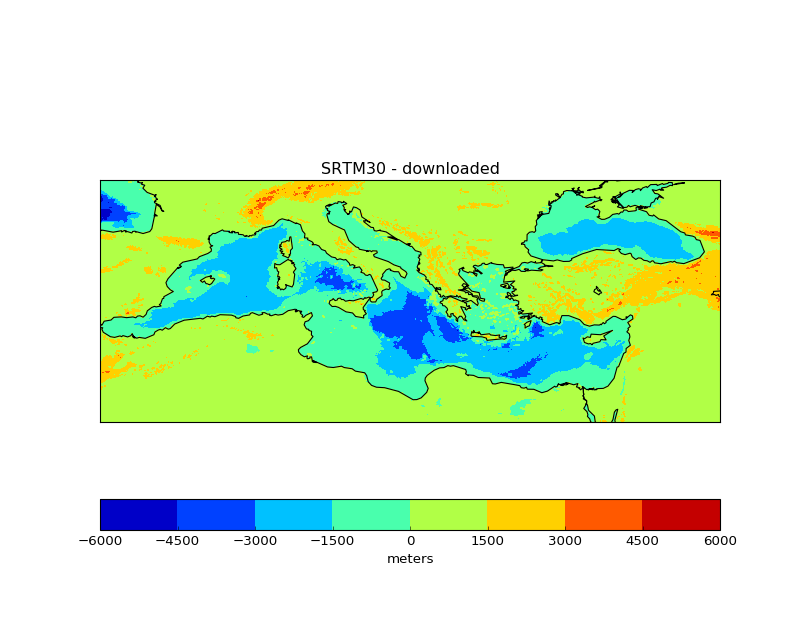

In [11]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,lons,lats,topo,title='SRTM30 - downloaded')

## LOCAL DATA

In [6]:
pathb='/DATA/critechuser/REPOS/StormS/BATHYMETRY/GLOBAL/'

In [7]:
boption={'srtm30' : 'topo30.grd', 'gebco08_deltares' : 'gebco30_DELTARES.nc', 'gebco2014' : 'GEBCO_2014_2D.nc', 'gebco08_hyflux' : 'gebco30.nc' }

###  SMTR30

In [14]:
m1,m2,bg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['srtm30'])

<IPython.core.display.Javascript object>


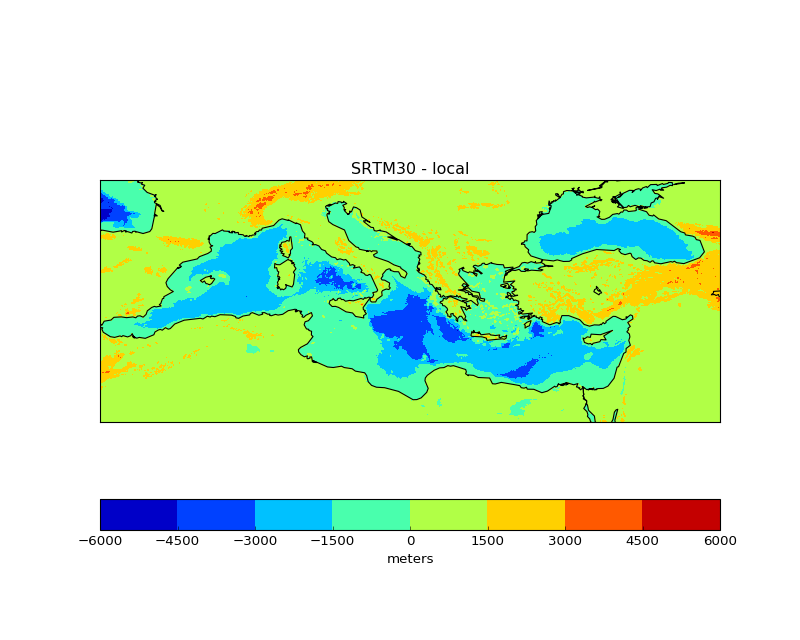

In [15]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,m1,m2,bg,title='SRTM30 - local')

### Gebco08 deltares 

This is the gebco files downloaded from url='http://opendap.deltares.nl/thredds/dodsC/opendap/deltares/delftdashboard/bathymetry/gebco_08/zl01/catalog.html'.
These files where merged together in one file with the script merge.sh in ...BATHYMETRY/gebco08. 

In [16]:
g1,g2,gg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco08_deltares'])

<IPython.core.display.Javascript object>


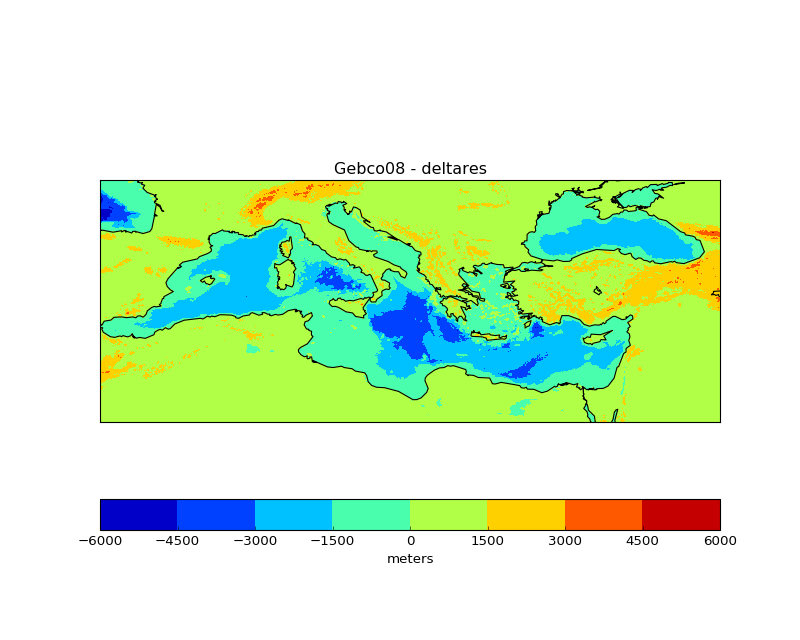

In [17]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,g1,g2,gg,title='Gebco08 - deltares')

### Gebco08 Hyflux 

This is the modified gebco08 bathymetry that hyflux is using 

In [18]:
h1,h2,hg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco08_hyflux'])

<IPython.core.display.Javascript object>


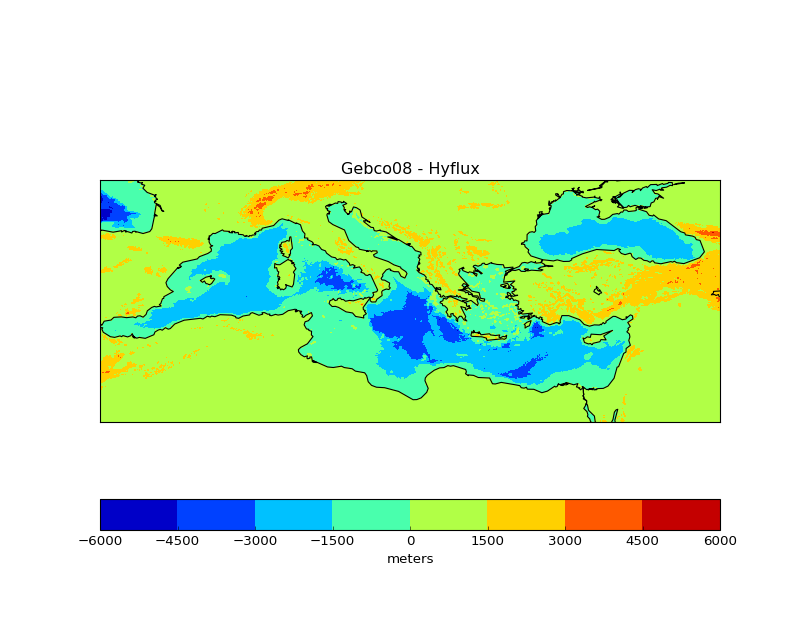

In [19]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,h1,h2,hg,title='Gebco08 - Hyflux')

### Gebco2014

This is the 2014 gebco 30 arc seconds downloaded from https://www.bodc.ac.uk/data/online_delivery/gebco/.

In [20]:
s1,s2,sg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco2014'])

<IPython.core.display.Javascript object>


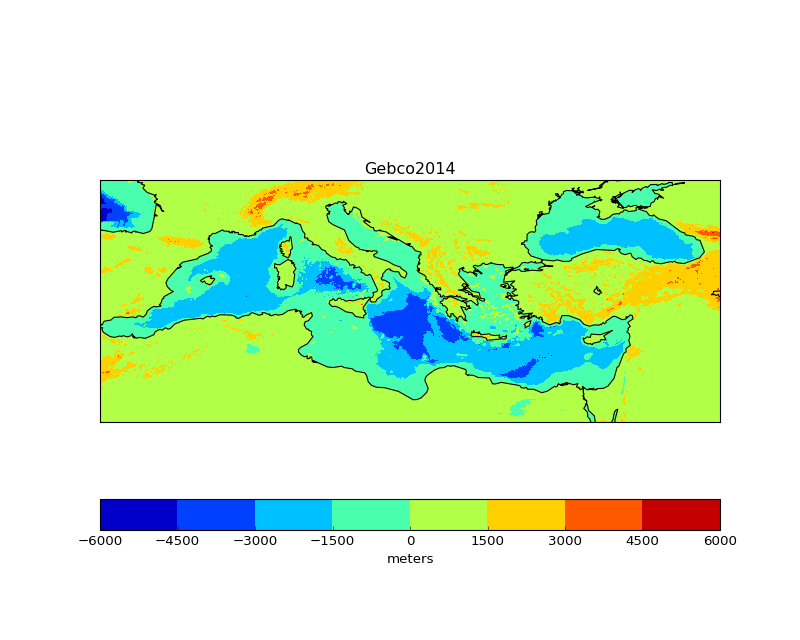

In [21]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,s1,s2,sg,title='Gebco2014')

## COMPARE VALUES

In [22]:
dp=hg-gg

In [23]:
# mask the zero values
dp=np.ma.masked_where(dp==0,dp)

<IPython.core.display.Javascript object>


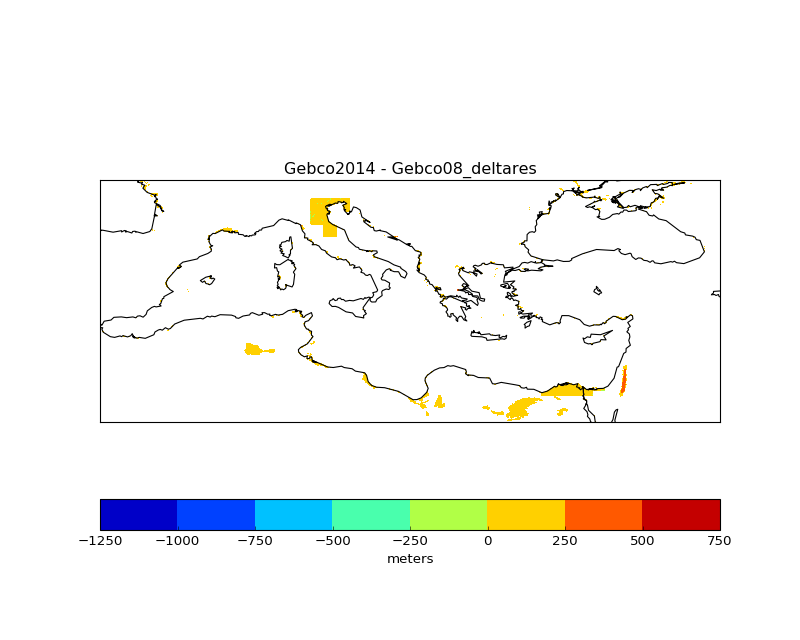

In [24]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,g1,g2,dp,title='Gebco2014 - Gebco08_deltares')

### Bathymetry file from HyFlux

In [8]:
from pmap import *

In [9]:
bath=getmap('/mnt/ECMWF/processed/2016/FIX_MED_SEA/final/bathymetry.tif')

In [10]:
bath

Bunch(CELLSIZE=0.06671251356601715, DRIVER='GeoTIFF', GeoTr=(-5.5, 0.06671251356601715, 0.0, 47.5, 0.0, -0.06666667014360428), NCOLS=727, NROWS=285, Proj='GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]', XSTART=-5.5, YSTART=47.5, data=array([[ 134.74589539,  197.14859009,  306.37973022, ..., -108.71473694,
         -96.97529602, -107.74279022],
       [ 137.25064087,  282.1572876 ,  372.54095459, ...,  -52.73230743,
         -63.9824295 ,  -76.74369049],
       [ 162.60765076,  200.94989014,  321.54678345, ...,  -47.49898529,
         -45.76268005,  -42.        ],
       ..., 
       [-487.00854492, -488.74621582, -482.00097656, ..., -678.0723877 ,
        -672.59692383, -663.25354004],
       [-475.756073  , -476.73693848, -475.74346924, ..., -673.75598145,
        -692.18322754, -688.50488281],
       [-467.50073242, -470.9921

In [11]:
gt=bath.GeoTr

In [12]:
width=bath.NCOLS
height=bath.NROWS

minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5]
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

hlon=np.linspace(minx,maxx,width,endpoint=True)
hlat=np.linspace(miny,maxy,height,endpoint=True)

In [13]:
hlons, hlats = np.meshgrid(hlon,hlat)

In [14]:
hfs=-np.flipud(bath.data)

<IPython.core.display.Javascript object>


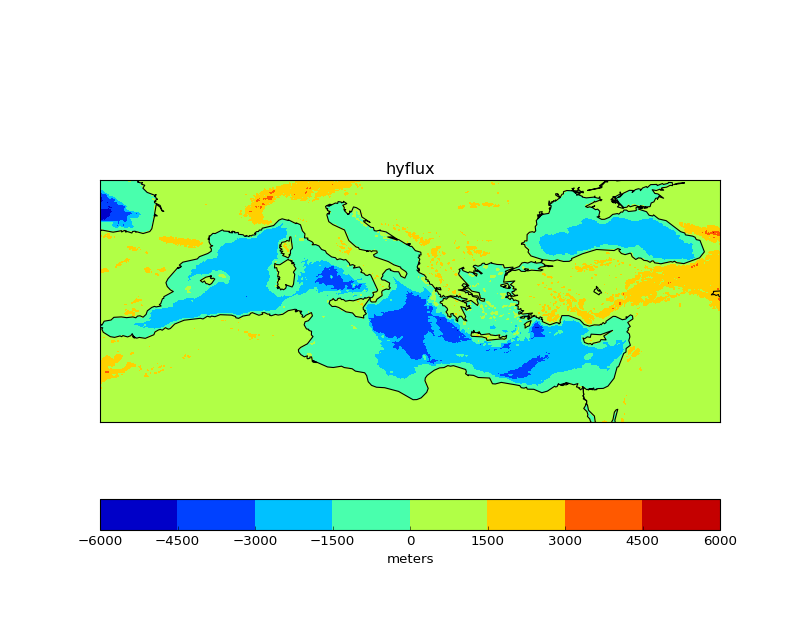

In [15]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,hlons,hlats,hfs,title='hyflux')

## interpolate from hyflux gebco08

In [16]:
ihg = readem(float(minlat),float(maxlat),float(minlon),float(maxlon),pathb+boption['gebco08_hyflux'],grid_x=hlons,grid_y=hlats,plot=False,interpolate=True)

<IPython.core.display.Javascript object>


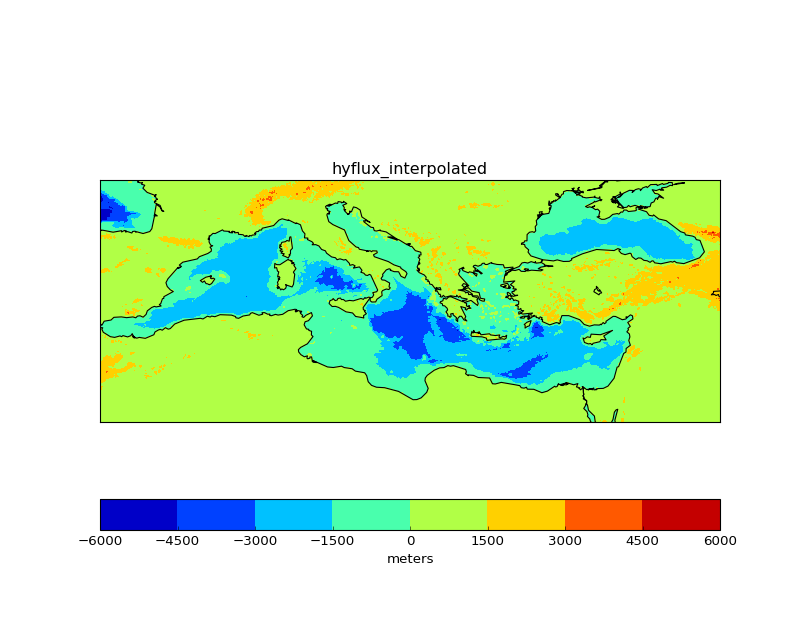

In [23]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,hlons,hlats,ihg,title='hyflux_interpolated')

In [18]:
dif=hfs-ihg

<IPython.core.display.Javascript object>


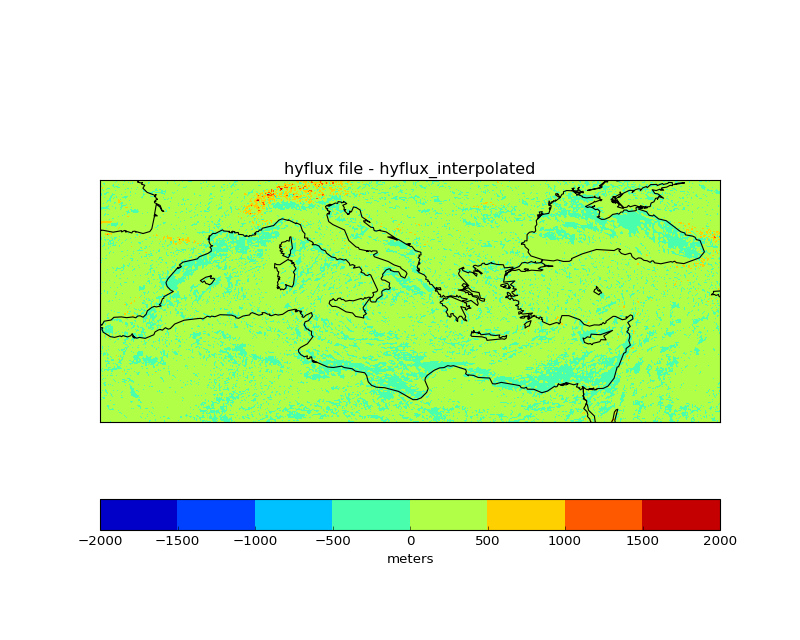

In [21]:
# Create map
pltm(minlat,maxlat,minlon,maxlon,hlons,hlats,dif,title='hyflux file - hyflux_interpolated')